In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df= pd.read_csv("Student scores.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [10]:
df.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [17]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


Text(0.5, 1.0, 'Gender distribution')

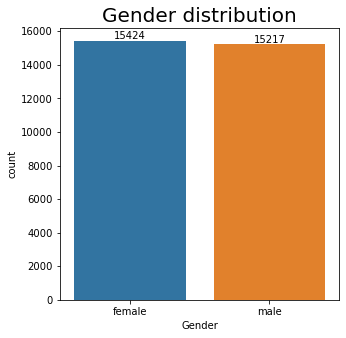

In [51]:
plt.figure(figsize=(5,5))
plot= sns.countplot(data=df, x="Gender")
plot.bar_label(plot.containers[0])
plt.title("Gender distribution",size=20)

# Number of females is more compared to males

In [33]:
degree= df.groupby("ParentEduc").agg({"MathScore":"mean", 'ReadingScore':'mean', 'WritingScore':"mean"})
degree

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


Text(0.5, 1.0, 'Relationship between parents education and student scores')

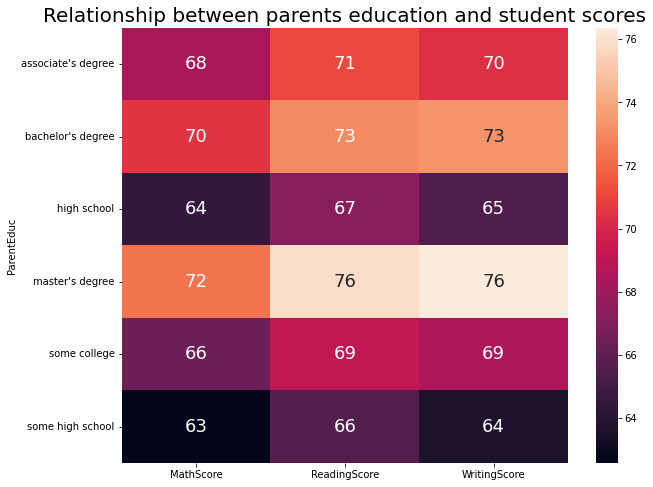

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(degree, annot= True, annot_kws={"size": 18})
plt.title("Relationship between parents education and student scores",size=20)

# Parental education level is strongly correlated with student academic achievement. Students whose parents have bachelor's or master's degrees tend to outperform those whose parents only have a high school education

In [39]:
ms= df.groupby("ParentMaritalStatus").agg({"MathScore":"mean", 'ReadingScore':'mean', 'WritingScore':"mean"})
ms

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


Text(0.5, 1.0, 'Relationship between marital status and student scores')

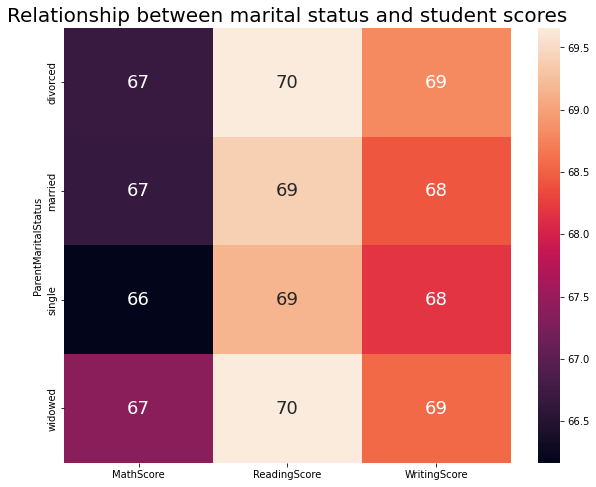

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(ms, annot =True, annot_kws={"size": 18})
plt.title("Relationship between marital status and student scores", size= 20)

# Marital status have negligible impact on student scores

In [56]:
sh= df.groupby("WklyStudyHours").agg({"WklyStudyHours":"count"})
sh

,WklyStudyHours
WklyStudyHours,
5 - 10,16246
< 5,8238
> 10,5202


Text(0.5, 1.0, 'Weekly Study Hours Distribution')

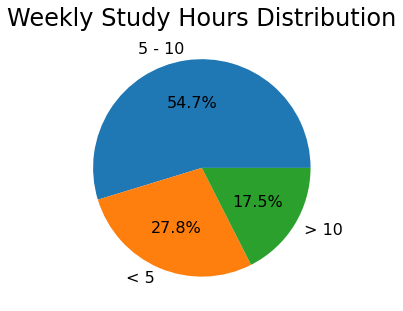

In [70]:
plt.figure(figsize=(10,5))
plt.pie(sh['WklyStudyHours'], labels=sh.index, autopct='%1.1f%%', textprops={'fontsize': 16})
plt.title('Weekly Study Hours Distribution', size=24)

In [72]:
marks= df.groupby("WklyStudyHours").agg({"MathScore":"mean", 'ReadingScore':'mean', 'WritingScore':"mean"})

Text(0.5, 1.0, 'Relationship between study hours and student scores')

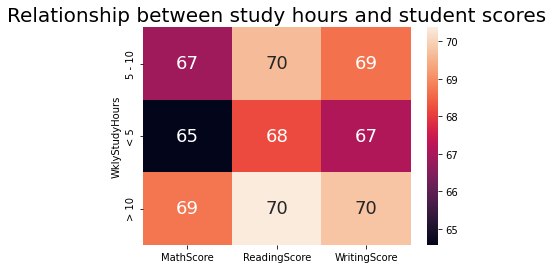

In [76]:
sns.heatmap(marks, annot= True, annot_kws={"size": 18})
plt.title("Relationship between study hours and student scores", size= 20)

# Study hours have high impact on scores

In [77]:
group= df.groupby("EthnicGroup").agg({"EthnicGroup":"count"})
group

,EthnicGroup
EthnicGroup,
group A,2219
group B,5826
group C,9212
group D,7503
group E,4041


Text(0.5, 1.0, 'Student distribution by ethnic group')

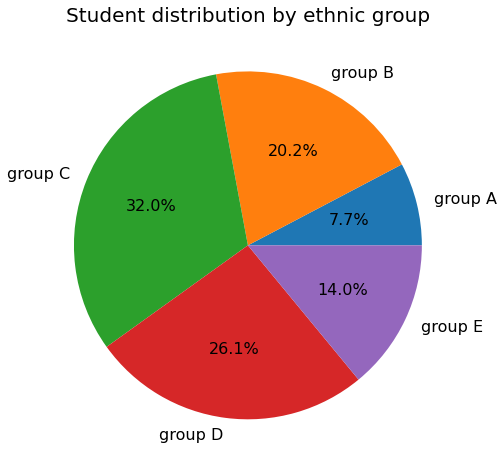

In [85]:
plt.figure(figsize=(10,8))
plt.pie(group['EthnicGroup'], labels= group.index, autopct= '%1.1f%%', textprops={'fontsize':16})
plt.title("Student distribution by ethnic group", size=20)

In [86]:
sports= df.groupby('PracticeSport').agg({"MathScore":"mean", 'ReadingScore':'mean', 'WritingScore':"mean"})
sports

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


Text(0.5, 1.0, 'Relationship between playing sports and student scores')

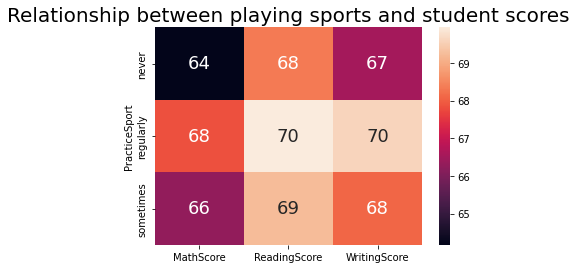

In [89]:
sns.heatmap(sports, annot= True, annot_kws={"size": 18})
plt.title("Relationship between playing sports and student scores", size= 20)

# Playing sports have positive impact on scores